In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Locale: Utilizado para formatação de datas, valores, dias de acordo com a região que queremos.
import locale 
#Warnings: Possui detalhes sobre os avisos e alertas que aparecem, porém podemos utiliza-lo também para que os alertas de
#futuras atualizações e metodos depreciados não sejam exibidos
import warnings
warnings.filterwarnings("ignore")
#comando utilizado para exibir todas as colunas
pd.set_option('display.max_columns',None)
from shapely.geometry import Point


Gerando dados geoespaciais para criarmos o mapa:
#dados importados do site do IBGE: https://www.ibge.gov.br/geocienciasorganizacao-do-territorio/malhas-territoriais/15774-malhas.html?=&t=acesso-ao-produto

In [3]:
#importando arquivo contendo georeferencia
dados_municipios=gpd.read_file("SP_Municipios_2021/")
dados_municipios.head()


,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
0,3500105,Adamantina,SP,411.987,"POLYGON ((-51.05425 -21.40465, -51.05300 -21.4..."
1,3500204,Adolfo,SP,211.055,"POLYGON ((-49.65795 -21.20333, -49.65645 -21.2..."
2,3500303,Aguaí,SP,474.554,"POLYGON ((-46.97640 -21.96818, -46.97599 -21.9..."
3,3500402,Águas da Prata,SP,142.673,"POLYGON ((-46.73501 -21.81891, -46.73431 -21.8..."
4,3500501,Águas de Lindóia,SP,60.126,"POLYGON ((-46.60614 -22.44173, -46.60347 -22.4..."


In [4]:
type(dados_municipios)


geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

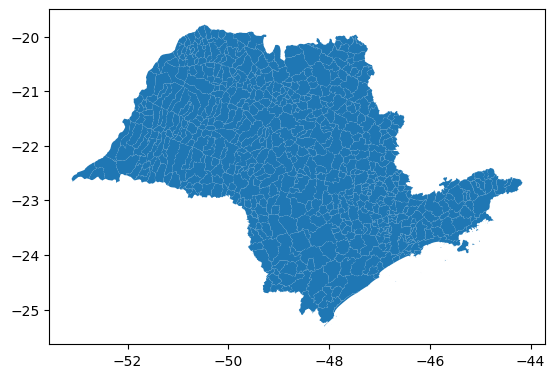

In [5]:
#aqui estamoos visualizando os dados contidos geografico do Estado de SP separado por municipio
dados_municipios.plot()

<AxesSubplot:>

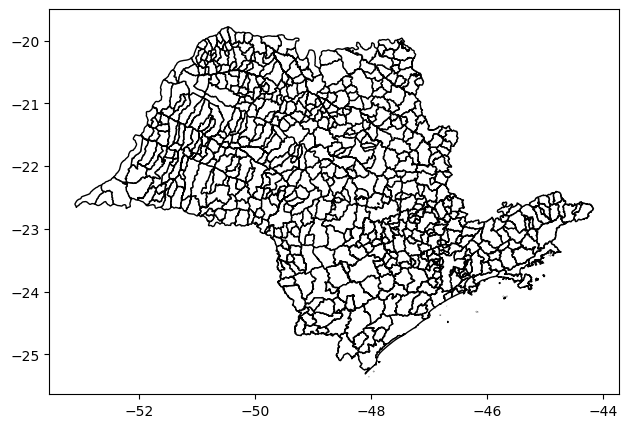

In [6]:
#salvar margem municipios de
dados_municipios.plot(figsize=(10,5),facecolor='white',edgecolor='black')

In [7]:
dados_municipios.to_file('mapa_completo.Json',driver='GeoJSON')

In [8]:
#dos dados a cima, vmao filtrar apenas a capita de são paulo
dados_municipios=dados_municipios[dados_municipios['NM_MUN']=='São Paulo']
gdf_dados_sp=dados_municipios

<AxesSubplot:>

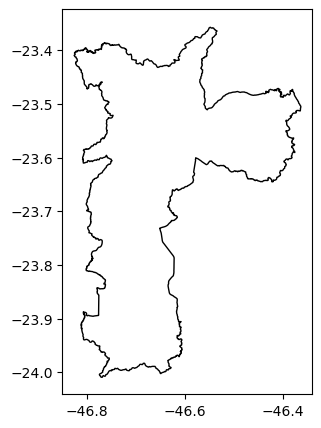

In [9]:
# aqui temos uam melhor visualização dos dados
gdf_dados_sp.plot(figsize=(10,5),facecolor='white',edgecolor='black')
#plt.show()

In [10]:
#Aqui vamos salvar o mapa que cria
gdf_dados_sp.to_file('municipiosp.json', driver= 'GeoJSON')


In [11]:
gdf_dados_sp

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
562,3550308,São Paulo,SP,1521.202,"POLYGON ((-46.54624 -23.35791, -46.54585 -23.3..."


# Variavel salvando mapa somente da capital SP primeira parte finalizada
gdf_dados_sp


# Agora vamos importar e analisar os dados

In [12]:
# Criando variavel principal
dados_rveiculos=pd.read_excel('dadosBO_2022_10_roubo_de_veiculos_sp.xlsx')

In [13]:
dados_rveiculos.head()

,ANO_BO,NUM_BO,NUMERO_BOLETIM,PERIDOOCORRENCIA,BO_AUTORIA,FLAGRANTE,NUMERO_BOLETIM_PRINCIPAL,LOGRADOURO,NUMERO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,EXAME,SOLUCAO,DELEGACIA_NOME,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,DESDOBRAMENTO,STATUS,TIPOPESSOA,VITIMAFATAL,NATURALIDADE,NACIONALIDADE,SEXO,IDADE,ESTADOCIVIL,PROFISSAO,GRAUINSTRUCAO,CORCUTIS,NATUREZAVINCULADA,TIPOVINCULO,RELACIONAMENTO,PARENTESCO,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
0,2022,1710084,1710084/2022,A NOITE,Desconhecida,Não,NaN,RUA JORGE NEWBERY,92,JACANA,S.PAULO,SP,-23.481049,-46.566076,Garagem ou abrigo de residência,NaN,BO PARA INVESTIGAÇÃO,DELEGACIA ELETRONICA,73º D.P. JACANA,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EUX4246,SP,S.PAULO,Prata,HONDA/CITY DX FLEX,2011.0,NaN,AUTOMOVEL,NaN,NaN
1,2022,1710085,1710085/2022,A NOITE,Desconhecida,Não,NaN,RUA PARATINGA,81,CONCEICAO,DIADEMA,SP,-23.702040,-46.620427,Via pública,NaN,BO PARA INVESTIGAÇÃO,DELEGACIA ELETRONICA,01º D.P. DIADEMA,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DXF9J96,SP,DIADEMA,Vermelho,I/TOYOTA COROLLA,2022.0,NaN,AUTOMOVEL,NaN,NaN
2,2022,2381,2381/2022,A NOITE,Desconhecida,Não,NaN,RUA JOSE RAFAELLI,272,SOCORRO,S.PAULO,SP,-23.666840,-46.722660,Via pública,NaN,BO PARA INVESTIGAÇÃO,102º D.P. SOCORRO,102º D.P. SOCORRO,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FNW7B16,SP,S.PAULO,Branco,HONDA/ADV 150,2021.0,2022.0,MOTONETA,NaN,NaN
3,2022,7423,7423/2022,A NOITE,Conhecida,Sim,NaN,Avenida Senador Lacerda Franco,970,Jardim do Lago,CAMPINAS,SP,-22.936142,-47.088884,Via pública,NaN,BO PARA FLAGRANTE,PLANTÃO - 01 DP CAMPINAS,02º D.P. CAMPINAS,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GBT1A77,SP,CAMPINAS,Preta,I/TOYOTA HILUX CDSRXA4FD,2022.0,2022.0,CAMINHONETE,NaN,NaN
4,2022,1710093,1710093/2022,A NOITE,Desconhecida,Não,NaN,Avenida Carlos Caldeira Filho,31,Vila Prel,S.PAULO,SP,-23.645960,-46.753704,Via pública,NaN,BO PARA INVESTIGAÇÃO,DELEGACIA ELETRONICA,37º D.P. CAMPO LIMPO,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GEA7G37,SP,S.PAULO,Azul,YAMAHA/FZ25 FAZER,2022.0,NaN,MOTOCICLO,NaN,NaN


In [14]:
# verificar como estão organizados os dados de latidute e  longitude no nosso mapa
dados_rveiculos[['LATITUDE','LONGITUDE']]


,LATITUDE,LONGITUDE
0,-23.481049,-46.566076
1,-23.702040,-46.620427
2,-23.666840,-46.722660
3,-22.936142,-47.088884
4,-23.645960,-46.753704
...,...,...
13834,-23.649012,-46.490679
13835,-23.649012,-46.490679
13836,-23.651202,-46.575947
13837,-23.558067,-46.403499


In [15]:
dados_rveiculos.info()
#Aqui estamos vendo que existem celulas onde temos ados núlos, sendo assim não podemos utilizar estas células
dados_rveiculos.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13839 entries, 0 to 13838
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ANO_BO                    13839 non-null  int64  
 1   NUM_BO                    13839 non-null  int64  
 2   NUMERO_BOLETIM            13839 non-null  object 
 3   PERIDOOCORRENCIA          13839 non-null  object 
 4   BO_AUTORIA                13839 non-null  object 
 5   FLAGRANTE                 13839 non-null  object 
 6   NUMERO_BOLETIM_PRINCIPAL  6333 non-null   object 
 7   LOGRADOURO                13131 non-null  object 
 8   NUMERO                    13839 non-null  int64  
 9   BAIRRO                    13384 non-null  object 
 10  CIDADE                    13839 non-null  object 
 11  UF                        13839 non-null  object 
 12  LATITUDE                  12573 non-null  float64
 13  LONGITUDE                 12573 non-null  float64
 14  DESCRI

ANO_BO                          0
NUM_BO                          0
NUMERO_BOLETIM                  0
PERIDOOCORRENCIA                0
BO_AUTORIA                      0
FLAGRANTE                       0
NUMERO_BOLETIM_PRINCIPAL     7506
LOGRADOURO                    708
NUMERO                          0
BAIRRO                        455
CIDADE                          0
UF                              0
LATITUDE                     1266
LONGITUDE                    1266
DESCRICAOLOCAL                  0
EXAME                       13839
SOLUCAO                         0
DELEGACIA_NOME                  0
DELEGACIA_CIRCUNSCRICAO         0
ESPECIE                         0
RUBRICA                         0
DESDOBRAMENTO               13784
STATUS                          0
TIPOPESSOA                  13708
VITIMAFATAL                 13708
NATURALIDADE                13837
NACIONALIDADE               13837
SEXO                        13708
IDADE                       13766
ESTADOCIVIL   

In [16]:
dados_rveiculos=dados_rveiculos.dropna(subset= ['LATITUDE','LONGITUDE'])
dados_rveiculos.info()
dados_rveiculos.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12573 entries, 0 to 13838
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ANO_BO                    12573 non-null  int64  
 1   NUM_BO                    12573 non-null  int64  
 2   NUMERO_BOLETIM            12573 non-null  object 
 3   PERIDOOCORRENCIA          12573 non-null  object 
 4   BO_AUTORIA                12573 non-null  object 
 5   FLAGRANTE                 12573 non-null  object 
 6   NUMERO_BOLETIM_PRINCIPAL  5696 non-null   object 
 7   LOGRADOURO                12573 non-null  object 
 8   NUMERO                    12573 non-null  int64  
 9   BAIRRO                    12182 non-null  object 
 10  CIDADE                    12573 non-null  object 
 11  UF                        12573 non-null  object 
 12  LATITUDE                  12573 non-null  float64
 13  LONGITUDE                 12573 non-null  float64
 14  DESCRI

ANO_BO                          0
NUM_BO                          0
NUMERO_BOLETIM                  0
PERIDOOCORRENCIA                0
BO_AUTORIA                      0
FLAGRANTE                       0
NUMERO_BOLETIM_PRINCIPAL     6877
LOGRADOURO                      0
NUMERO                          0
BAIRRO                        391
CIDADE                          0
UF                              0
LATITUDE                        0
LONGITUDE                       0
DESCRICAOLOCAL                  0
EXAME                       12573
SOLUCAO                         0
DELEGACIA_NOME                  0
DELEGACIA_CIRCUNSCRICAO         0
ESPECIE                         0
RUBRICA                         0
DESDOBRAMENTO               12526
STATUS                          0
TIPOPESSOA                  12486
VITIMAFATAL                 12486
NATURALIDADE                12571
NACIONALIDADE               12571
SEXO                        12486
IDADE                       12504
ESTADOCIVIL   

In [17]:
dados_rveiculos.head()



,ANO_BO,NUM_BO,NUMERO_BOLETIM,PERIDOOCORRENCIA,BO_AUTORIA,FLAGRANTE,NUMERO_BOLETIM_PRINCIPAL,LOGRADOURO,NUMERO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,EXAME,SOLUCAO,DELEGACIA_NOME,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,DESDOBRAMENTO,STATUS,TIPOPESSOA,VITIMAFATAL,NATURALIDADE,NACIONALIDADE,SEXO,IDADE,ESTADOCIVIL,PROFISSAO,GRAUINSTRUCAO,CORCUTIS,NATUREZAVINCULADA,TIPOVINCULO,RELACIONAMENTO,PARENTESCO,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
0,2022,1710084,1710084/2022,A NOITE,Desconhecida,Não,NaN,RUA JORGE NEWBERY,92,JACANA,S.PAULO,SP,-23.481049,-46.566076,Garagem ou abrigo de residência,NaN,BO PARA INVESTIGAÇÃO,DELEGACIA ELETRONICA,73º D.P. JACANA,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EUX4246,SP,S.PAULO,Prata,HONDA/CITY DX FLEX,2011.0,NaN,AUTOMOVEL,NaN,NaN
1,2022,1710085,1710085/2022,A NOITE,Desconhecida,Não,NaN,RUA PARATINGA,81,CONCEICAO,DIADEMA,SP,-23.702040,-46.620427,Via pública,NaN,BO PARA INVESTIGAÇÃO,DELEGACIA ELETRONICA,01º D.P. DIADEMA,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DXF9J96,SP,DIADEMA,Vermelho,I/TOYOTA COROLLA,2022.0,NaN,AUTOMOVEL,NaN,NaN
2,2022,2381,2381/2022,A NOITE,Desconhecida,Não,NaN,RUA JOSE RAFAELLI,272,SOCORRO,S.PAULO,SP,-23.666840,-46.722660,Via pública,NaN,BO PARA INVESTIGAÇÃO,102º D.P. SOCORRO,102º D.P. SOCORRO,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FNW7B16,SP,S.PAULO,Branco,HONDA/ADV 150,2021.0,2022.0,MOTONETA,NaN,NaN
3,2022,7423,7423/2022,A NOITE,Conhecida,Sim,NaN,Avenida Senador Lacerda Franco,970,Jardim do Lago,CAMPINAS,SP,-22.936142,-47.088884,Via pública,NaN,BO PARA FLAGRANTE,PLANTÃO - 01 DP CAMPINAS,02º D.P. CAMPINAS,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GBT1A77,SP,CAMPINAS,Preta,I/TOYOTA HILUX CDSRXA4FD,2022.0,2022.0,CAMINHONETE,NaN,NaN
4,2022,1710093,1710093/2022,A NOITE,Desconhecida,Não,NaN,Avenida Carlos Caldeira Filho,31,Vila Prel,S.PAULO,SP,-23.645960,-46.753704,Via pública,NaN,BO PARA INVESTIGAÇÃO,DELEGACIA ELETRONICA,37º D.P. CAMPO LIMPO,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GEA7G37,SP,S.PAULO,Azul,YAMAHA/FZ25 FAZER,2022.0,NaN,MOTOCICLO,NaN,NaN


Linhas com os valores núlos foram limpas, podemos ver que diminuimos a quantidade de linhas, porém não interfere no modelo

In [18]:
dados_rveiculos['geometry'] = None

for index, row in dados_rveiculos.iterrows():
    dados_rveiculos.loc[index,'geometry'] = Point(row.LONGITUDE,row.LATITUDE)
   


    

In [19]:
#Visualizando a variável criada 
dados_rveiculos.head()

,ANO_BO,NUM_BO,NUMERO_BOLETIM,PERIDOOCORRENCIA,BO_AUTORIA,FLAGRANTE,NUMERO_BOLETIM_PRINCIPAL,LOGRADOURO,NUMERO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,EXAME,SOLUCAO,DELEGACIA_NOME,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,DESDOBRAMENTO,STATUS,TIPOPESSOA,VITIMAFATAL,NATURALIDADE,NACIONALIDADE,SEXO,IDADE,ESTADOCIVIL,PROFISSAO,GRAUINSTRUCAO,CORCUTIS,NATUREZAVINCULADA,TIPOVINCULO,RELACIONAMENTO,PARENTESCO,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR,geometry
0,2022,1710084,1710084/2022,A NOITE,Desconhecida,Não,NaN,RUA JORGE NEWBERY,92,JACANA,S.PAULO,SP,-23.481049,-46.566076,Garagem ou abrigo de residência,NaN,BO PARA INVESTIGAÇÃO,DELEGACIA ELETRONICA,73º D.P. JACANA,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EUX4246,SP,S.PAULO,Prata,HONDA/CITY DX FLEX,2011.0,NaN,AUTOMOVEL,NaN,NaN,POINT (-46.566076401504 -23.4810489899443)
1,2022,1710085,1710085/2022,A NOITE,Desconhecida,Não,NaN,RUA PARATINGA,81,CONCEICAO,DIADEMA,SP,-23.702040,-46.620427,Via pública,NaN,BO PARA INVESTIGAÇÃO,DELEGACIA ELETRONICA,01º D.P. DIADEMA,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DXF9J96,SP,DIADEMA,Vermelho,I/TOYOTA COROLLA,2022.0,NaN,AUTOMOVEL,NaN,NaN,POINT (-46.6204272958686 -23.7020403512951)
2,2022,2381,2381/2022,A NOITE,Desconhecida,Não,NaN,RUA JOSE RAFAELLI,272,SOCORRO,S.PAULO,SP,-23.666840,-46.722660,Via pública,NaN,BO PARA INVESTIGAÇÃO,102º D.P. SOCORRO,102º D.P. SOCORRO,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FNW7B16,SP,S.PAULO,Branco,HONDA/ADV 150,2021.0,2022.0,MOTONETA,NaN,NaN,POINT (-46.722659595 -23.6668399179999)
3,2022,7423,7423/2022,A NOITE,Conhecida,Sim,NaN,Avenida Senador Lacerda Franco,970,Jardim do Lago,CAMPINAS,SP,-22.936142,-47.088884,Via pública,NaN,BO PARA FLAGRANTE,PLANTÃO - 01 DP CAMPINAS,02º D.P. CAMPINAS,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GBT1A77,SP,CAMPINAS,Preta,I/TOYOTA HILUX CDSRXA4FD,2022.0,2022.0,CAMINHONETE,NaN,NaN,POINT (-47.0888835 -22.936142)
4,2022,1710093,1710093/2022,A NOITE,Desconhecida,Não,NaN,Avenida Carlos Caldeira Filho,31,Vila Prel,S.PAULO,SP,-23.645960,-46.753704,Via pública,NaN,BO PARA INVESTIGAÇÃO,DELEGACIA ELETRONICA,37º D.P. CAMPO LIMPO,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GEA7G37,SP,S.PAULO,Azul,YAMAHA/FZ25 FAZER,2022.0,NaN,MOTOCICLO,NaN,NaN,POINT (-46.7537041 -23.6459599)


In [20]:
#criando Geodataframe
gdf_rveiculos=gpd.GeoDataFrame(dados_rveiculos,geometry='geometry')

In [21]:
#verificando o tipo dos dados
#segunda varivel já filtrada
type(gdf_rveiculos)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

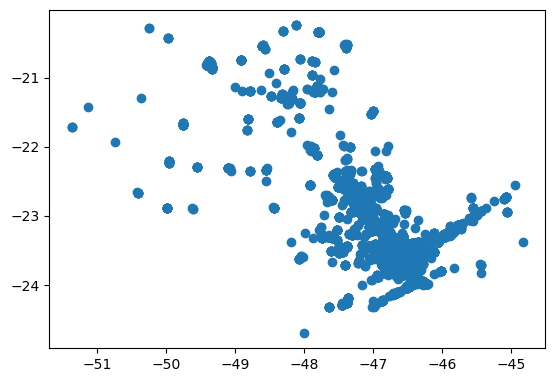

In [22]:
# aqui estamos plotando so dados de criminalidade apenas do municipio de São paulo
gdf_rveiculos.plot()

<AxesSubplot:>

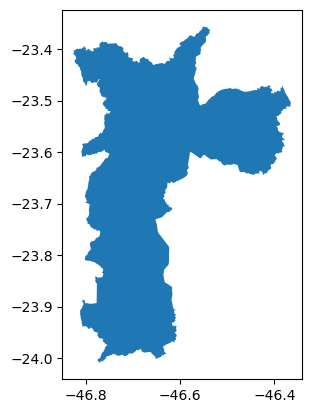

In [23]:
gdf_dados_filtr=gpd.read_file('municipiosp.json', driver= "GeoJSON")
gdf_dados_filtr.plot()

<AxesSubplot:>

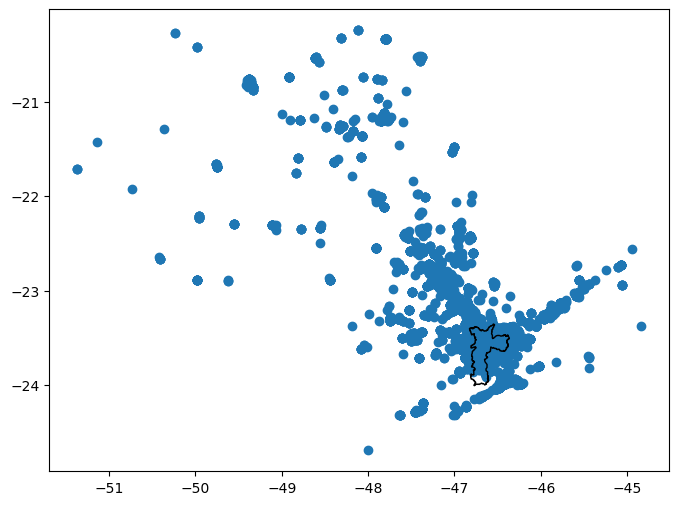

In [24]:
fig, ax= plt.subplots(figsize=(10,6))
gdf_rveiculos.plot(ax=ax)
gdf_dados_filtr.plot(ax=ax, facecolor='none',edgecolor='black')

In [25]:
polygon_Mapa=gdf_dados_sp.iloc[0].geometry


In [26]:
type(polygon_Mapa)

shapely.geometry.polygon.Polygon

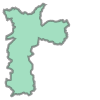

In [27]:
polygon_Mapa

In [28]:
#Aqui estamos salvando os dados de roubo de veiculos da cidade de SP dentro da geolocaização do municipio
gdf_rcapital=gdf_rveiculos[gdf_rveiculos.intersects(polygon_Mapa)]

<AxesSubplot:>

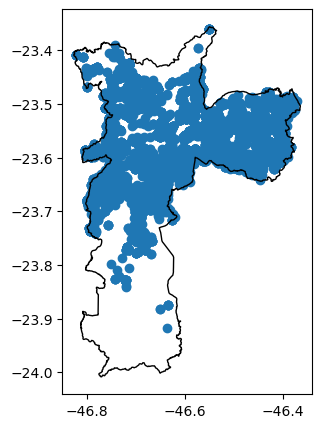

In [29]:
# Aqui estamos visualizando os dados salvos a cima
fig, ax= plt.subplots(figsize=(5,5))
gdf_rcapital.plot(ax=ax)
gdf_dados_sp.plot(ax=ax, facecolor='none',edgecolor='black')

In [30]:
gdf_rcapital.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 5230 entries, 0 to 13837
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ANO_BO                    5230 non-null   int64   
 1   NUM_BO                    5230 non-null   int64   
 2   NUMERO_BOLETIM            5230 non-null   object  
 3   PERIDOOCORRENCIA          5230 non-null   object  
 4   BO_AUTORIA                5230 non-null   object  
 5   FLAGRANTE                 5230 non-null   object  
 6   NUMERO_BOLETIM_PRINCIPAL  2542 non-null   object  
 7   LOGRADOURO                5230 non-null   object  
 8   NUMERO                    5230 non-null   int64   
 9   BAIRRO                    5119 non-null   object  
 10  CIDADE                    5230 non-null   object  
 11  UF                        5230 non-null   object  
 12  LATITUDE                  5230 non-null   float64 
 13  LONGITUDE                 5230 non-null

In [31]:
gdf_rcapital.crs = "epsg:4326"
gdf_rcapital =gdf_rcapital.to_crs(epsg=3857)

In [32]:
type(gdf_rcapital)

geopandas.geodataframe.GeoDataFrame

In [33]:
gdf_rcapital.to_file('dados_cruzados_capital.Json', driver='GeoJSON')

In [34]:
#iremos usar folium para criar uma apresentação grafica
import folium

In [35]:
fmap=folium.Map()
fmap

In [36]:
gdf_roubos_capi=gpd.read_file('dados_cruzados_capital.Json',driver='GeoJSON')
gdf_geomet_capsp=gpd.read_file('municipiosp.json', driver= "GeoJSON")

In [37]:
gdf_roubos_slice=gdf_roubos_capi.iloc[0:100]
#gdf_roubos_slice.crs = "epsg:4326"
#gdf_roubos_slice =gdf_roubos_slice.to_crs(epsg=3857)

fmap=folium.Map()
feat_geojson= folium.features.GeoJson(gdf_roubos_slice)
fmap.add_child(feat_geojson)
fmap

In [38]:
media_longitude=gdf_roubos_slice['LONGITUDE'].mean()
media_latitude=gdf_roubos_slice['LATITUDE'].mean()

fmap=folium.Map(location=[media_latitude,media_longitude])
feat_geojson= folium.features.GeoJson(gdf_roubos_slice)
fmap.add_child(feat_geojson)
fmap

In [39]:
#aqui estamos importando o plugin para visualizar todos os dados contidos no nosso dataframe
from folium.plugins import FastMarkerCluster

In [40]:
fmap=folium.Map(location=[media_latitude,media_longitude])

mc= FastMarkerCluster(gdf_roubos_capi[['LATITUDE','LONGITUDE']])


fmap.add_child(mc)
fmap

In [41]:
gdf_geomet_capsp

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
0,3550308,São Paulo,SP,1521.202,"POLYGON ((-46.54624 -23.35791, -46.54585 -23.3..."


In [42]:
fmap=folium.Map(location=[media_latitude,media_longitude])
limites= folium.features.GeoJson(gdf_geomet_capsp)
fmap.add_child(limites)

mc= FastMarkerCluster(gdf_roubos_capi[['LATITUDE','LONGITUDE']])


fmap.add_child(mc)
fmap

In [43]:
fmap.save('mapa_cap_SP.html')